### Submission 1: Price a European Up-and-out Call Option

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Initialize problem parameters
# option maturity
T = 1
# up-and-out barrier
L = 150
# current share price
S0 = 100
# strike price, at-the-money
K = 100
# risk-free rate
risk_free = .08
# volatility
sigma = .3

# counterparty firm current value
v_0 = 200 # Our assumption 
# volatility for the counterparty's firm
sigma_firm = .25
# counterparty's debt, due in one year 
debt = 175
# correlation
corr = .2
# recovery rate
recovery_rate = 0.25

########
#corr_matrix = np.array([[1, corr], [corr, 1]])
sample_sizes = range(1000, 50001, 1000)

In [3]:
#### 1. Simulate paths for the underlying share and for the counterparty’s firm value using sample sizes of 1000, 2000, …, 50000. Do monthly simulations for the lifetime of the option.

In [4]:
def share_path(S_0, risk_free_rate, sigma, Z, dT):
    return S_0*np.exp(np.cumsum((risk_free_rate-sigma**2/2)*dT + sigma*np.sqrt(dT)*Z,1))


def generate_share_and_firm_price(S0, v_0, risk_free, sigma, sigma_firm, corr, T, sample_size = 10, timesteps = 12):
    corr_matrix = np.array([[1, corr], [corr, 1]])
    norm_matrix = stats.norm.rvs(size = np.array([sample_size, 2, timesteps]))
    corr_norm_matrix = np.matmul(np.linalg.cholesky(corr_matrix), norm_matrix)
    
    share_price_path = pd.DataFrame(share_path(S0, risk_free, sigma, Z=corr_norm_matrix[:,0,], dT=1/timesteps))
    share_price_path = share_price_path.transpose()

    firm_price_path = pd.DataFrame(share_path(v_0, risk_free, sigma_firm, Z=corr_norm_matrix[:,1,], dT=1/timesteps))
    firm_price_path = firm_price_path.transpose()

    return [share_price_path,firm_price_path]  

To double check that the stock prices and firm values monthly returns are correlated, we check them as follows:

In [5]:
#Testing share and firm price correlation
sample_size = 20
test = generate_share_and_firm_price(S0, v_0, risk_free, sigma, sigma_firm, corr, T, sample_size, timesteps = 20000)

share_ret = np.log(test[0])

for i in range(sample_size):
    test[0]['sharelog'] = np.log(test[0][i])
    test[1]['firmlog'] = np.log(test[1][i])
    print(stats.pearsonr(test[0]['sharelog'].diff().dropna(), test[1]['firmlog'].diff().dropna()))

(0.20097443843969845, 2.624370669633501e-181)
(0.1940908062897218, 5.279059842089317e-169)
(0.20004408240979316, 1.2851781140002602e-179)
(0.2103245125442213, 9.171305271508425e-199)
(0.191363133548915, 2.9530401953525186e-164)
(0.21360374268948662, 4.317804249228759e-205)
(0.2045470302954011, 7.090774759559466e-188)
(0.2059854568684347, 1.4813154241201997e-190)
(0.20421880071084958, 2.879972841505771e-187)
(0.204793345035591, 2.4729292806368403e-188)
(0.19409834287897243, 5.1208084415575195e-169)
(0.19674997347549622, 1.0579608423995759e-173)
(0.20198036150666035, 3.821891177052217e-183)
(0.19321676356020634, 1.7854757178105067e-167)
(0.2009782156628681, 2.583133085420183e-181)
(0.19911448027867265, 6.152738083290726e-178)
(0.19173572108312464, 6.698992089340822e-165)
(0.1945397820288707, 8.59323407658573e-170)
(0.19332830474247248, 1.14029732233512e-167)
(0.19747082153541184, 5.483285131400938e-175)


Let's try to simulate the share price with a small number of sample paths and visualize them over the course of 12 months

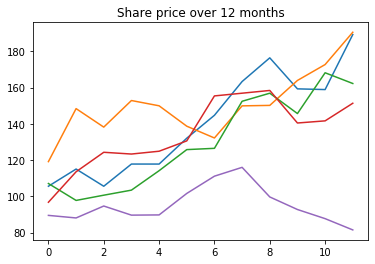

In [6]:
share_and_firm_price_12_months = generate_share_and_firm_price(S0, v_0, risk_free, sigma, sigma_firm, corr, T, sample_size = 5, timesteps = 12)
share_price_12_months = share_and_firm_price_12_months[0]
share_price_12_months.plot(title='Share price over 12 months', legend=False)

We can do the same thing to simulate counterparty firm's value

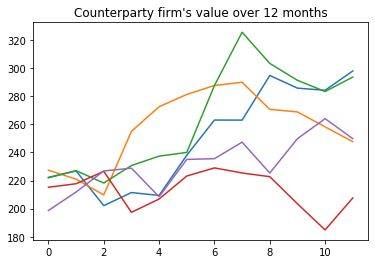

In [7]:
#firm_value_12_months = generate_share_price(v_0, r, sigma_firm, T, sample_size=5)
#firm_value_12_months.plot(title="Counterparty firm's value over 12 months", legend=False)
firm_value_12_months = share_and_firm_price_12_months[1]
firm_value_12_months.plot(title="Counterparty firm's value over 12 months", legend=False)

In fact, we can also simulate the dynamic with finer resolution.

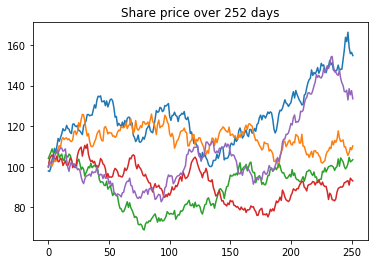

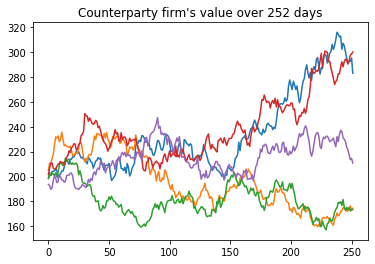

In [8]:
share_and_firm_price_252_days = generate_share_and_firm_price(S0, v_0, risk_free, sigma, sigma_firm, corr, T, sample_size = 5, timesteps = 252)
share_price_252_days = share_and_firm_price_252_days[0]
firm_price_252_days = share_and_firm_price_252_days[1]
share_price_252_days.plot(title='Share price over 252 days', legend=False)
firm_price_252_days.plot(title="Counterparty firm's value over 252 days", legend=False)

Let's visualize when the stopped process is appied

In [9]:
def stop(s, cond):
    ret = s.copy()
    r = ret[cond]
    if len(r) > 0:
        print(r)
        ret[r.idxmin():] = 0
    return ret

7     163.360975
8     176.443749
9     159.324102
10    158.931653
11    189.292966
Name: 0, dtype: float64
7     163.360975
8     176.443749
9     159.324102
10    158.931653
11    189.292966
Name: 0, dtype: float64
3     152.885066
8     150.198620
9     163.964076
10    172.740225
11    190.573594
Name: 1, dtype: float64
7     152.469717
8     156.927436
10    168.205074
11    162.282854
Name: 2, dtype: float64
6     155.431109
7     156.931295
8     158.439911
11    151.376235
Name: 3, dtype: float64


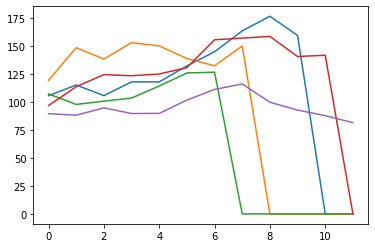

In [10]:
share_price_12_months.apply(lambda s: stop(s, s>L), axis=0).plot(legend=False)

In [11]:
# define payoff for up-and-out call option
def payoff(S_t, K, L):
    stopped_S = S_t.iloc[-1].where((S_t < L).all(), 0)
    return np.maximum(stopped_S - K, 0).to_numpy()

payoff(share_price_12_months, K, L)

array([0., 0., 0., 0., 0.])

Now let's increase the sample size to be able to estimate the mean price more accurately

In [12]:
import datetime

share_price_paths = {}
firm_val_paths = {}


for sample_size in sample_sizes:
    share_val, firm_val = generate_share_and_firm_price(S0, v_0, risk_free, sigma, sigma_firm, corr, T, sample_size = sample_size, timesteps = 12)
     
    share_price_paths[sample_size] = share_val
    firm_val_paths[sample_size] = firm_val
    #print("Updated for sample size {} at {}".format(sample_size, datetime.datetime.now().strftime('%H:%M')))

In [13]:
%%capture
option_paths = share_price_paths[1000].apply(lambda s: stop(s, s>L), axis=0)

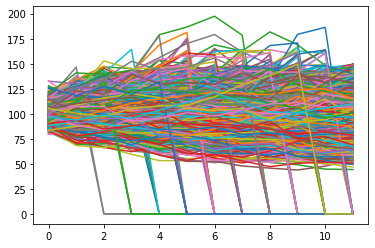

In [14]:
# plot monthly simulations for the lifetime of the option
option_paths.plot(legend=False)

#### 2. Determine the Monte Carlo estimates of the both the default-free value of the option and the Credit Valuation Adjustment

In [15]:
# Estimate the default-free value of the option:
option_estimate = []
option_std = []

for sample_size, paths in share_price_paths.items(): 
    payoffs = payoff(paths, K, L)
    option_price = np.exp(-risk_free*T)*payoffs
    option_estimate.append(option_price.mean())
    option_std.append(option_price.std()/np.sqrt(sample_size))


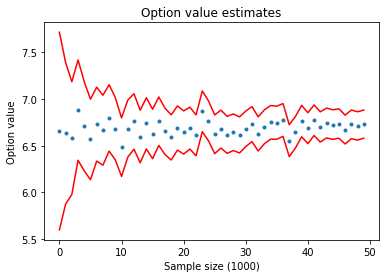

In [16]:
plt.plot(option_estimate, '.')
plt.plot(option_estimate + 3 * np.array(option_std), 'r')
plt.plot(option_estimate - 3 * np.array(option_std), 'r')
plt.title("Option value estimates")
plt.xlabel("Sample size (1000)")
plt.ylabel("Option value")
plt.show()

## CVA Adjustment

As per notes, default can only occur at time T, and firm defaults if the firm value is below firm debt amount

In [17]:
def terminal_value(S_0, risk_free_rate, sigma, Z, T): #applies to both firm and stock
    return S_0 * np.exp((risk_free_rate - sigma**2/2) * T + sigma * np.sqrt(T) * Z)

In [18]:
cva_estimate = []
cva_std = []

for sample_size, paths in share_price_paths.items(): 
    payoffs = payoff(paths, K, L)
    term_firm_vals = firm_val_paths[sample_size].iloc[-1].to_numpy()
    amount_lost = np.exp(-risk_free*T)*(1-recovery_rate)*(term_firm_vals < debt)*payoffs
    cva_estimate.append(amount_lost.mean())
    cva_std.append(amount_lost.std()/np.sqrt(sample_size))
    

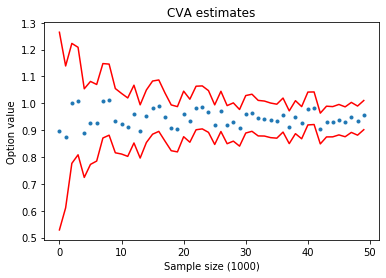

In [19]:
plt.plot(cva_estimate, '.')
plt.plot(cva_estimate + 3 * np.array(cva_std), 'r')
plt.plot(cva_estimate - 3 * np.array(cva_std), 'r')
plt.title("CVA estimates")
plt.xlabel("Sample size (1000)")
plt.ylabel("Option value")
plt.show()

3. Calculate the Monte Carlo estimates for the price of the option incorporating counterparty risk, given by the default-free price less the CVA.

In [20]:
option_cva_adjusted_prices = []
option_cva_adjusted_std = []

for sample_size, paths in share_price_paths.items(): 
    payoffs = payoff(paths, K, L)
    option_price = np.exp(-risk_free*T)*payoffs

    term_firm_vals = firm_val_paths[sample_size].iloc[-1].to_numpy()
    amount_lost = np.exp(-risk_free*T)*(1-recovery_rate)*(term_firm_vals < debt)*payoffs
    
    option_cva_price = option_price - amount_lost
    
    option_cva_adjusted_prices.append(option_cva_price.mean())
    option_cva_adjusted_std.append(option_cva_price.std()/np.sqrt(sample_size))



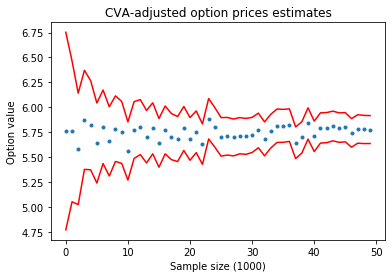

In [21]:
plt.plot(option_cva_adjusted_prices, '.')
plt.plot(option_cva_adjusted_prices + 3 * np.array(option_cva_adjusted_std), 'r')
plt.plot(option_cva_adjusted_prices - 3 * np.array(option_cva_adjusted_std), 'r')
plt.title("CVA-adjusted option prices estimates")
plt.xlabel("Sample size (1000)")
plt.ylabel("Option value")
plt.show()